In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
sys.path.append('../utils')
import Aircraft3dofModel
import FinaltimeFreeCost
import Aircraft3dofConstraints
from scipy.integrate import solve_ivp
from Scvx_tf_free import Scvx_tf_free
from Scaling import TrajectoryScaling

In [32]:
ix = 6
iu = 3
tf = 800
N = 200
delT = tf/N
max_iter = 10

In [33]:
myModel = Aircraft3dofModel.Aircraft3dof('Hello',ix,iu,linearization="numeric_central")
myCost = FinaltimeFreeCost.Finaltime('Hello',ix,iu,N)
myConst = Aircraft3dofConstraints.Aircraft3dof('Hello',ix,iu)

x_min = np.zeros(ix)
x_max = np.array([120*1e3,40*1e3,5000,270,np.deg2rad(20),np.pi])
u_min = np.array([0,0,0])
u_max = np.array([1,np.deg2rad(30),1126.3 * 1e3])

myScaling = TrajectoryScaling(x_min,x_max,u_min,u_max,tf)

In [34]:
xi = np.array([-0*1e3,40*1e3,5000,240,0,np.pi])
xf = np.array([0,0,0,95,0,0])

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf

u0 = np.zeros((N+1,iu))
u0[:,0] = 0.5 # setting not as zero is pretty critical
u0[:,2] = 0.0

In [47]:
i1 = Scvx_tf_free('unicycle',N,tf,max_iter,myModel,myCost,myConst,myScaling,
          type_discretization='foh',w_c=1e-5,w_vc=1e3,w_tr=1e2,tol_vc=1e-6,tol_tr=1e-4,tol_bc=1,flag_policyopt=False)
x,u,xbar,ubar,tfbar,total_num_iter,flag_boundary,l,l_vc,l_tr = i1.run(x0,u0,xi,xf)

prop_n - prop -2.1518836292010566e-05
iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        bounary
1           10586.240         0.006       0.287       103         -9.79e+03   100.000000  0(3.84e+04)
prop_n - prop -4.7298859718012635e-05
2           1359.548          0.008       1.33e-09    13.6        9.23e+03    100.000000  0(5.93e+04)
prop_n - prop -8.812426733563992e-05
3           82.104            0.008       1.1e-10     0.821       1.28e+03    100.000000  0(2.39e+03)
prop_n - prop -0.00011338501880260945
4           0.195             0.008       5.4e-13     0.00186     81.9        100.000000  0(599)
prop_n - prop -0.00011100655716391565
5           0.008             0.008       1.45e-11    1.75e-08    0.186       100.000000  1(0.536)
SUCCEESS: virtual control and trust region < tol


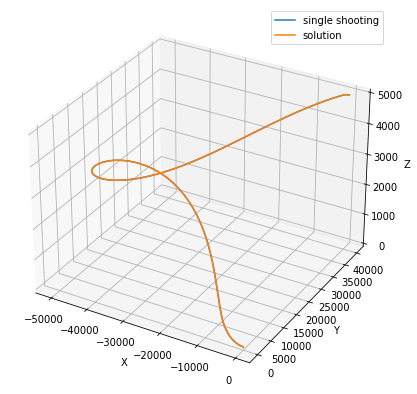

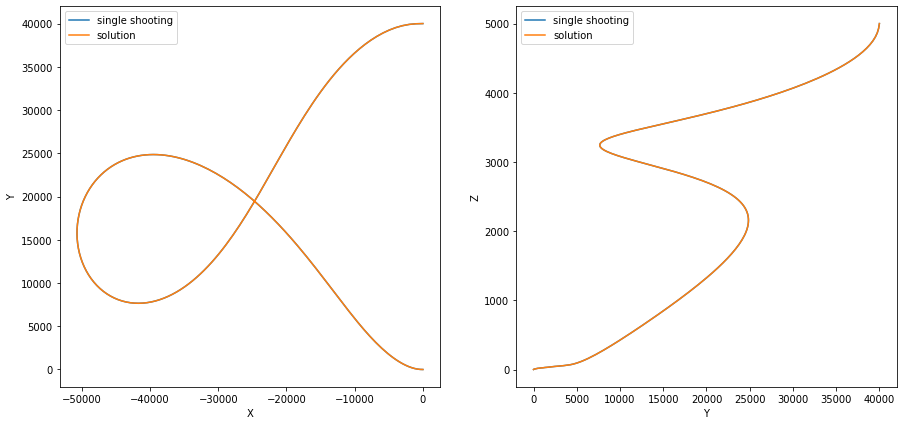

In [48]:
fig = plt.figure(1,figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(x[:, 0], x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],label='solution')
plt.legend()
fig = plt.figure(2,figsize=(15,7))
ax = fig.add_subplot(121)
ax.plot(x[:, 0], x[:, 1],label='single shooting')
ax.plot(xbar[:, 0], xbar[:, 1],label='solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
ax = fig.add_subplot(122)
ax.plot(x[:, 1], x[:, 2],label='single shooting')
ax.plot(xbar[:, 1], xbar[:, 2],label='solution')
ax.set_xlabel('Y')


ax.set_ylabel('Z')
plt.legend()
# ax.plot(xbar[:, 0], xbar[:, 1], xbar[:, 2],'o')

Text(0.5, 1.0, 'thrust')

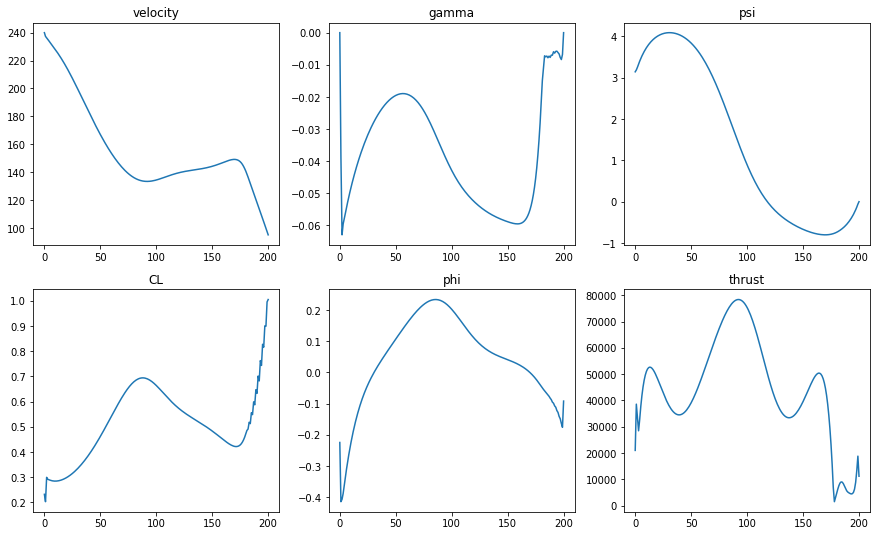

In [49]:
plt.figure(figsize=(15,9))
plt.subplot(231)
plt.plot(xbar[:,3])
plt.title('velocity')

plt.subplot(232)
plt.plot(xbar[:,4])
plt.title('gamma')

plt.subplot(233)
plt.plot(xbar[:,5])
plt.title('psi')

plt.subplot(234)
plt.plot(ubar[:,0])
plt.title('CL')

plt.subplot(235)
plt.plot(ubar[:,1])
plt.title('phi')

plt.subplot(236)
plt.plot(ubar[:,2])
plt.title('thrust')